<a href="https://colab.research.google.com/github/malay42/Unsupervised-Anomaly-Detection-on-Healthcare-providers-data_Infosys_Internship_Oct2024/blob/main/Project_10_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"/content/Healthcare Provider.csv")

In [3]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [4]:
data.shape


(100000, 27)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [6]:
data.isnull().sum()

,0
index,0
National Provider Identifier,0
Last Name/Organization Name of the Provider,0
First Name of the Provider,4255
Middle Initial of the Provider,29331
Credentials of the Provider,7209
Gender of the Provider,4254
Entity Type of the Provider,0
Street Address 1 of the Provider,0
Street Address 2 of the Provider,59363


In [7]:
miss_data = data.isnull().mean() * 100
print(miss_data[miss_data > 0])

First Name of the Provider           4.255
Middle Initial of the Provider      29.331
Credentials of the Provider          7.209
Gender of the Provider               4.254
Street Address 2 of the Provider    59.363
dtype: float64


In [8]:
data_dropped = data.drop(columns=["Street Address 2 of the Provider", "Middle Initial of the Provider"])

In [9]:
data_dropped.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,M.D.,F,I,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,M.D.,F,I,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,DPM,M,I,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,MD,M,I,5746 N BROADWAY ST,KANSAS CITY,641183998.0,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,DO,M,I,875 MILITARY TRL,JUPITER,334585700.0,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [10]:
data_dropped["First Name of the Provider"] = data_dropped["First Name of the Provider"].fillna("Unknown")
data_dropped["Gender of the Provider"] = data_dropped["Gender of the Provider"].fillna("Unknown")
data_dropped["Credentials of the Provider"] = data_dropped["Credentials of the Provider"].fillna("Unknown")


In [11]:
data_dropped.isnull().sum()

,0
index,0
National Provider Identifier,0
Last Name/Organization Name of the Provider,0
First Name of the Provider,0
Credentials of the Provider,0
Gender of the Provider,0
Entity Type of the Provider,0
Street Address 1 of the Provider,0
City of the Provider,0
Zip Code of the Provider,0


In [12]:
data_dropped.shape

(100000, 25)

In [13]:
data_dropped.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [14]:
data_dropped.duplicated().sum()


0

In [15]:
data_dropped.dtypes

,0
index,int64
National Provider Identifier,int64
Last Name/Organization Name of the Provider,object
First Name of the Provider,object
Credentials of the Provider,object
Gender of the Provider,object
Entity Type of the Provider,object
Street Address 1 of the Provider,object
City of the Provider,object
Zip Code of the Provider,float64


In [16]:
data_dropped.isna().sum()

,0
index,0
National Provider Identifier,0
Last Name/Organization Name of the Provider,0
First Name of the Provider,0
Credentials of the Provider,0
Gender of the Provider,0
Entity Type of the Provider,0
Street Address 1 of the Provider,0
City of the Provider,0
Zip Code of the Provider,0


In [17]:
duplicates = data_dropped.columns[data_dropped.columns.duplicated()].tolist()
print(f"Duplicate columns: {duplicates}")


Duplicate columns: []


In [18]:
numeric_columns = [
     'Zip Code of the Provider',
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for column in numeric_columns:
    data_dropped[column] = pd.to_numeric(data_dropped[column] , errors = 'coerce')



In [19]:
data_dropped.dtypes

,0
index,int64
National Provider Identifier,int64
Last Name/Organization Name of the Provider,object
First Name of the Provider,object
Credentials of the Provider,object
Gender of the Provider,object
Entity Type of the Provider,object
Street Address 1 of the Provider,object
City of the Provider,object
Zip Code of the Provider,float64


In [20]:
!pip install matplotlib


In [21]:
import matplotlib.pyplot as plt


In [22]:
pip install seaborn


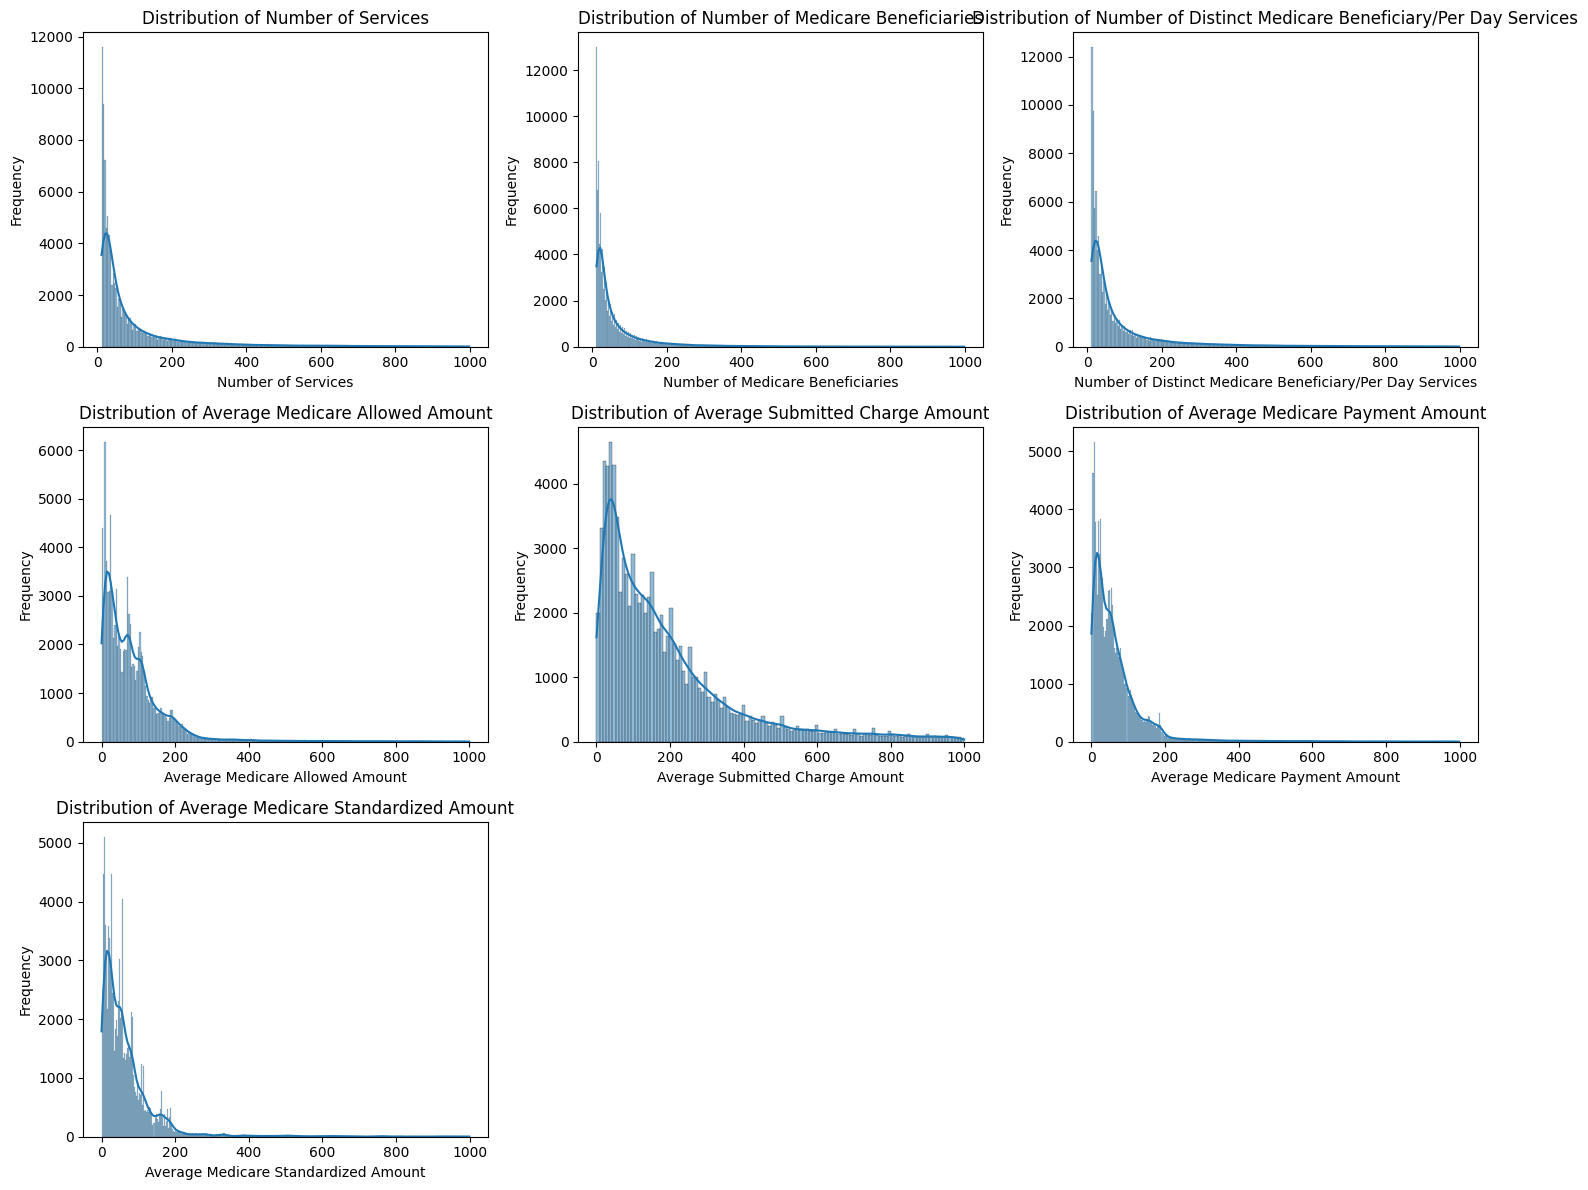

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the size of the figure and number of subplots
plt.figure(figsize=(15, 12))

# List of column names for iteration
columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Loop through each column to create subplots
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns
    sns.histplot(data_dropped[col], kde=True)  # Using histplot for better visual representation with kde curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display all the subplots
plt.show()


Summary Statistics:
               index  National Provider Identifier  Zip Code of the Provider  \
count  1.000000e+05                  1.000000e+05              1.000000e+05   
mean   4.907646e+06                  1.498227e+09              4.163820e+08   
std    2.839633e+06                  2.874125e+08              3.082566e+08   
min    2.090000e+02                  1.003001e+09              6.010000e+02   
25%    2.458791e+06                  1.245669e+09              1.426300e+08   
50%    4.901266e+06                  1.497847e+09              3.633025e+08   
75%    7.349450e+06                  1.740374e+09              6.819881e+08   
max    9.847440e+06                  1.993000e+09              9.990166e+08   

       Number of Services  Number of Medicare Beneficiaries  \
count        97347.000000                      99595.000000   
mean           100.574791                         69.228576   
std            149.868363                        101.900825   
min            

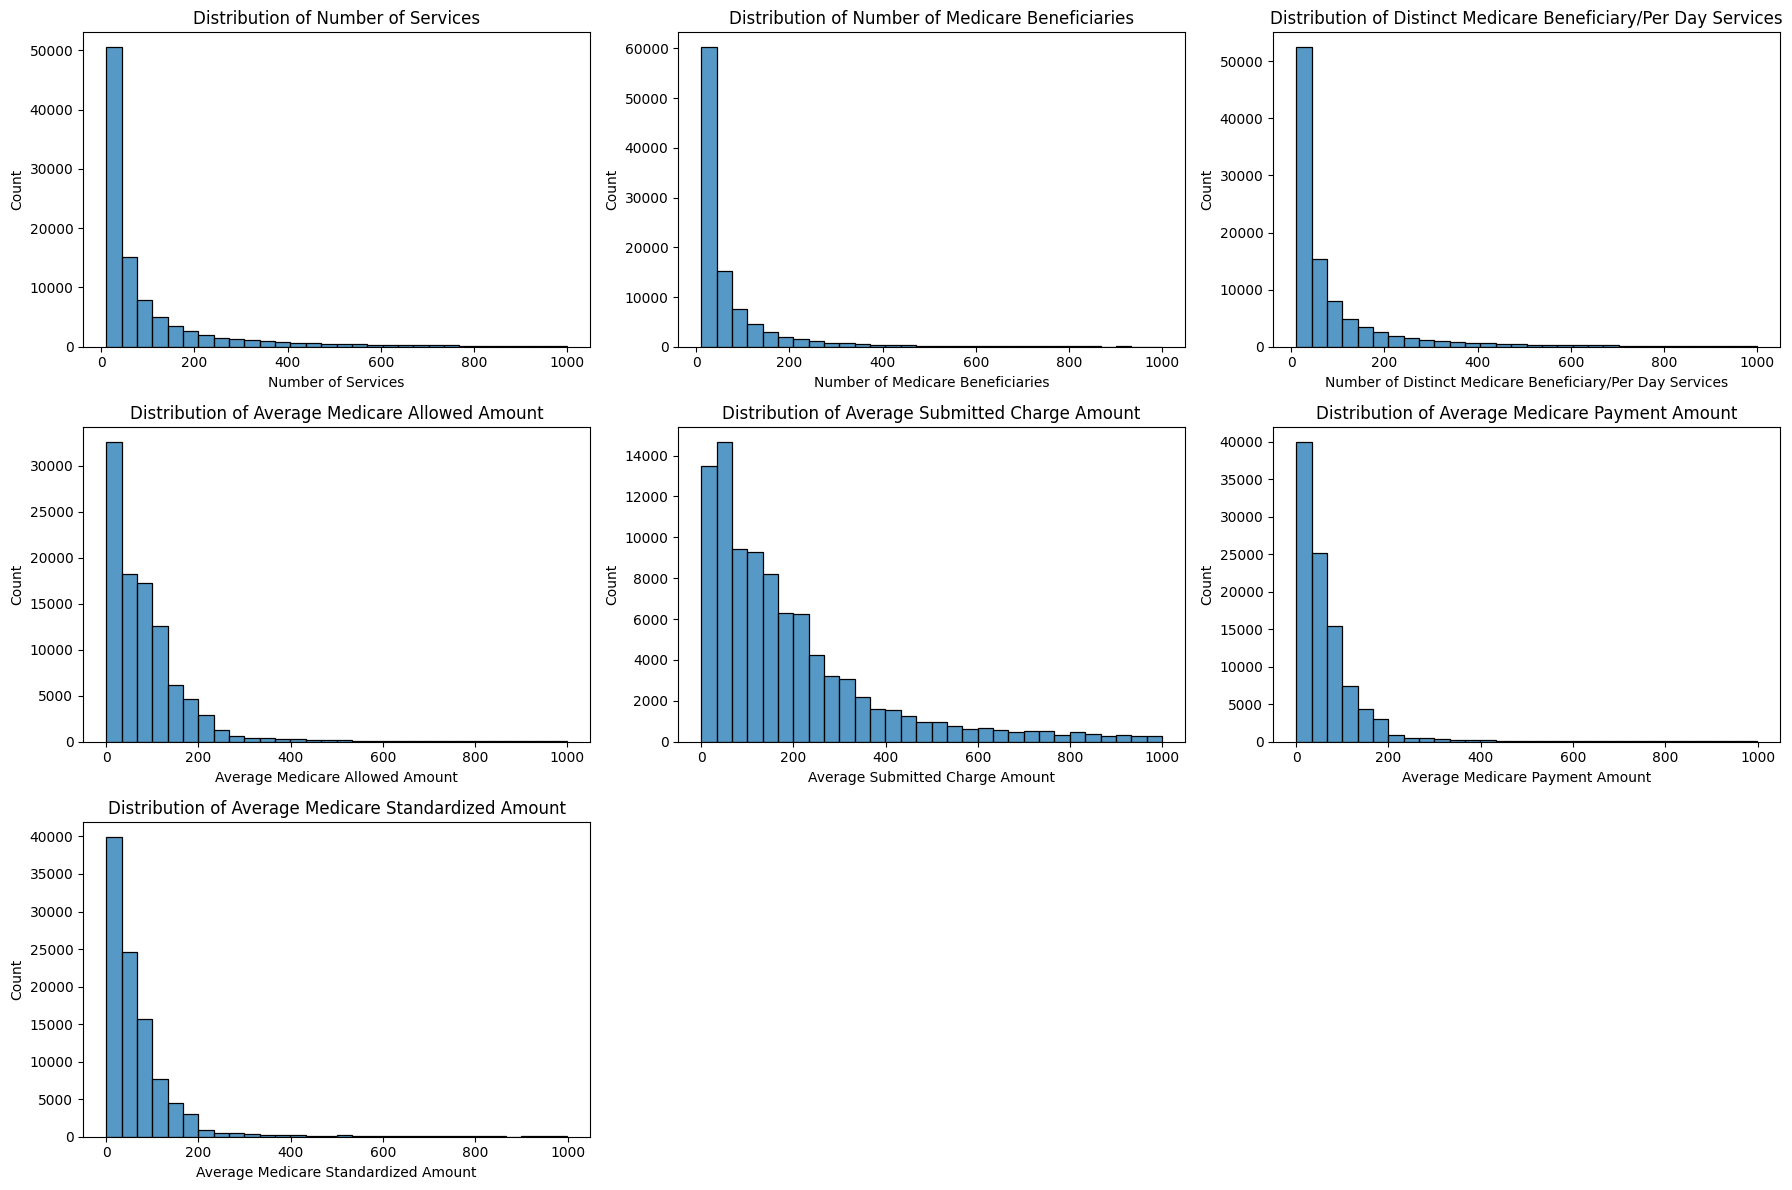

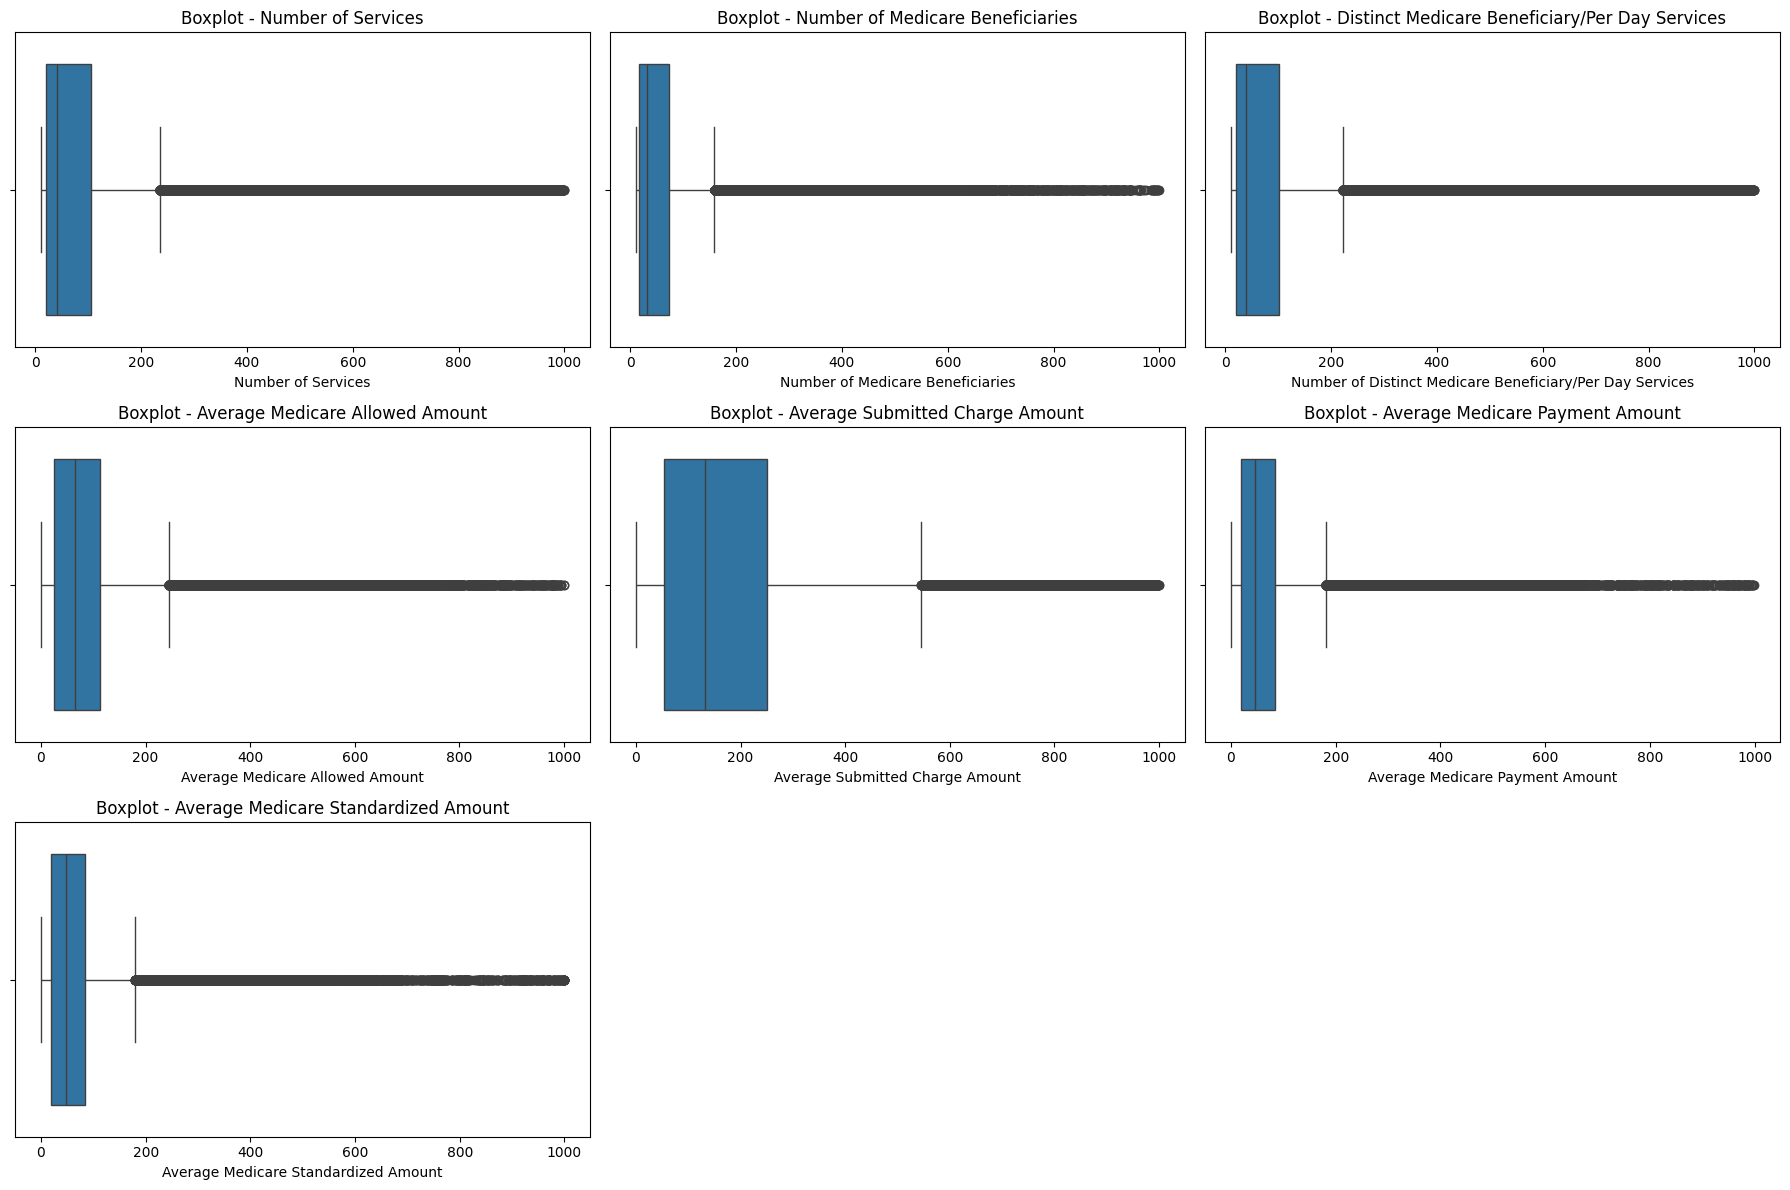

In [24]:

summary_stats = data_dropped.describe()
print("Summary Statistics:\n", summary_stats)


plt.figure(figsize=(18, 12))


plt.subplot(3, 3, 1)
sns.histplot(data=data_dropped, x='Number of Services', kde=False, bins=30)
plt.title('Distribution of Number of Services')


plt.subplot(3, 3, 2)
sns.histplot(data=data_dropped, x='Number of Medicare Beneficiaries', kde=False, bins=30)
plt.title('Distribution of Number of Medicare Beneficiaries')


plt.subplot(3, 3, 3)
sns.histplot(data=data_dropped, x='Number of Distinct Medicare Beneficiary/Per Day Services', kde=False, bins=30)
plt.title('Distribution of Distinct Medicare Beneficiary/Per Day Services')


plt.subplot(3, 3, 4)
sns.histplot(data=data_dropped, x='Average Medicare Allowed Amount', kde=False, bins=30)
plt.title('Distribution of Average Medicare Allowed Amount')


plt.subplot(3, 3, 5)
sns.histplot(data=data_dropped, x='Average Submitted Charge Amount', kde=False, bins=30)
plt.title('Distribution of Average Submitted Charge Amount')


plt.subplot(3, 3, 6)
sns.histplot(data=data_dropped, x='Average Medicare Payment Amount', kde=False, bins=30)
plt.title('Distribution of Average Medicare Payment Amount')


plt.subplot(3, 3, 7)
sns.histplot(data=data_dropped, x='Average Medicare Standardized Amount', kde=False, bins=30)
plt.title('Distribution of Average Medicare Standardized Amount')

plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 12))


plt.subplot(3, 3, 1)
sns.boxplot(x=data_dropped['Number of Services'])
plt.title('Boxplot - Number of Services')


plt.subplot(3, 3, 2)
sns.boxplot(x=data_dropped['Number of Medicare Beneficiaries'])
plt.title('Boxplot - Number of Medicare Beneficiaries')


plt.subplot(3, 3, 3)
sns.boxplot(x=data_dropped['Number of Distinct Medicare Beneficiary/Per Day Services'])
plt.title('Boxplot - Distinct Medicare Beneficiary/Per Day Services')

plt.subplot(3, 3, 4)
sns.boxplot(x=data_dropped['Average Medicare Allowed Amount'])
plt.title('Boxplot - Average Medicare Allowed Amount')


plt.subplot(3, 3, 5)
sns.boxplot(x=data_dropped['Average Submitted Charge Amount'])
plt.title('Boxplot - Average Submitted Charge Amount')


plt.subplot(3, 3, 6)
sns.boxplot(x=data_dropped['Average Medicare Payment Amount'])
plt.title('Boxplot - Average Medicare Payment Amount')


plt.subplot(3, 3, 7)
sns.boxplot(x=data_dropped['Average Medicare Standardized Amount'])
plt.title('Boxplot - Average Medicare Standardized Amount')

plt.tight_layout()
plt.show()


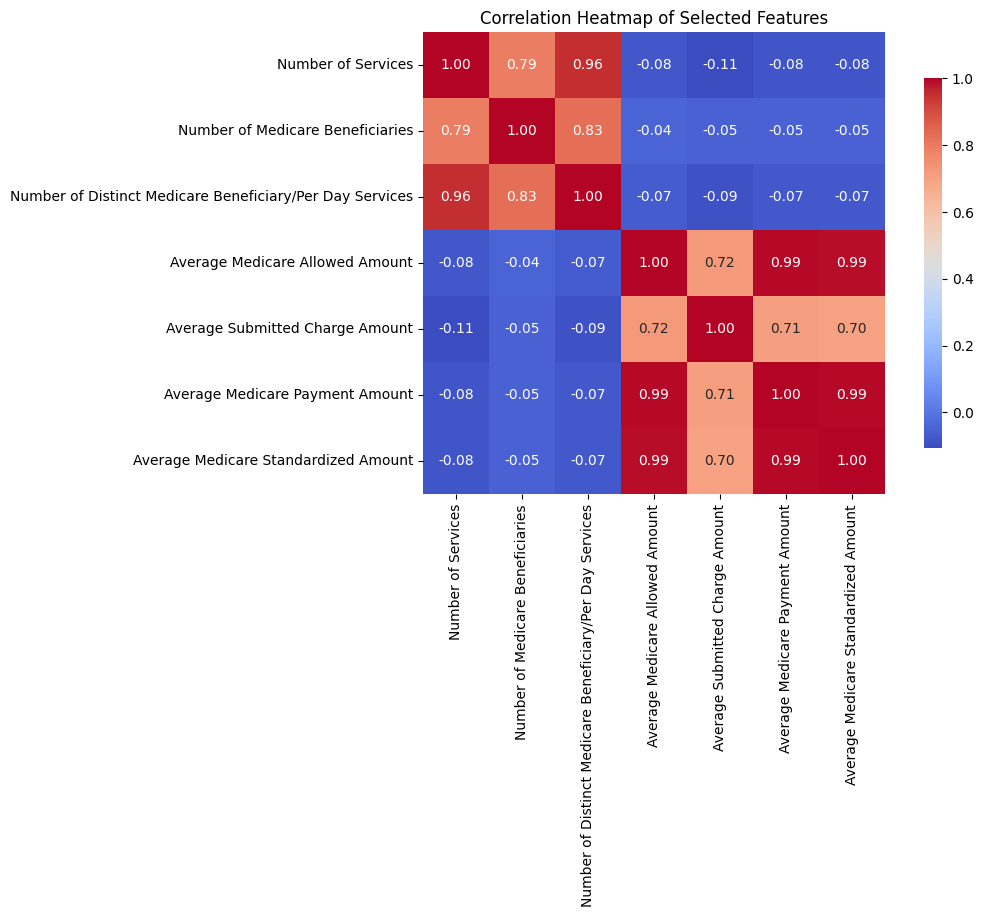

In [25]:
columns_of_interest = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]


correlation_matrix = data_dropped[columns_of_interest].corr()


plt.figure(figsize=(10, 6))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


plt.title('Correlation Heatmap of Selected Features')


plt.show()


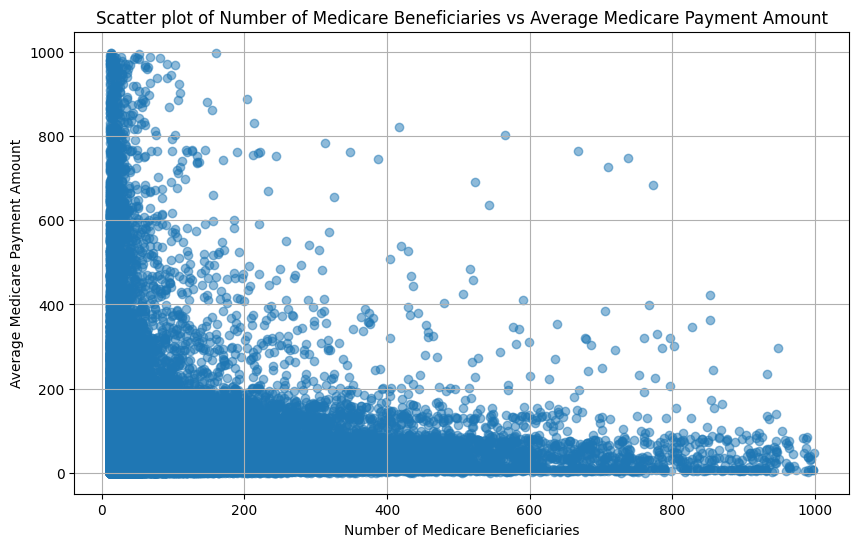

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(data_dropped['Number of Medicare Beneficiaries'], data_dropped['Average Medicare Payment Amount'], alpha=0.5)
plt.title('Scatter plot of Number of Medicare Beneficiaries vs Average Medicare Payment Amount')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Average Medicare Payment Amount')
plt.grid(True)
plt.show()

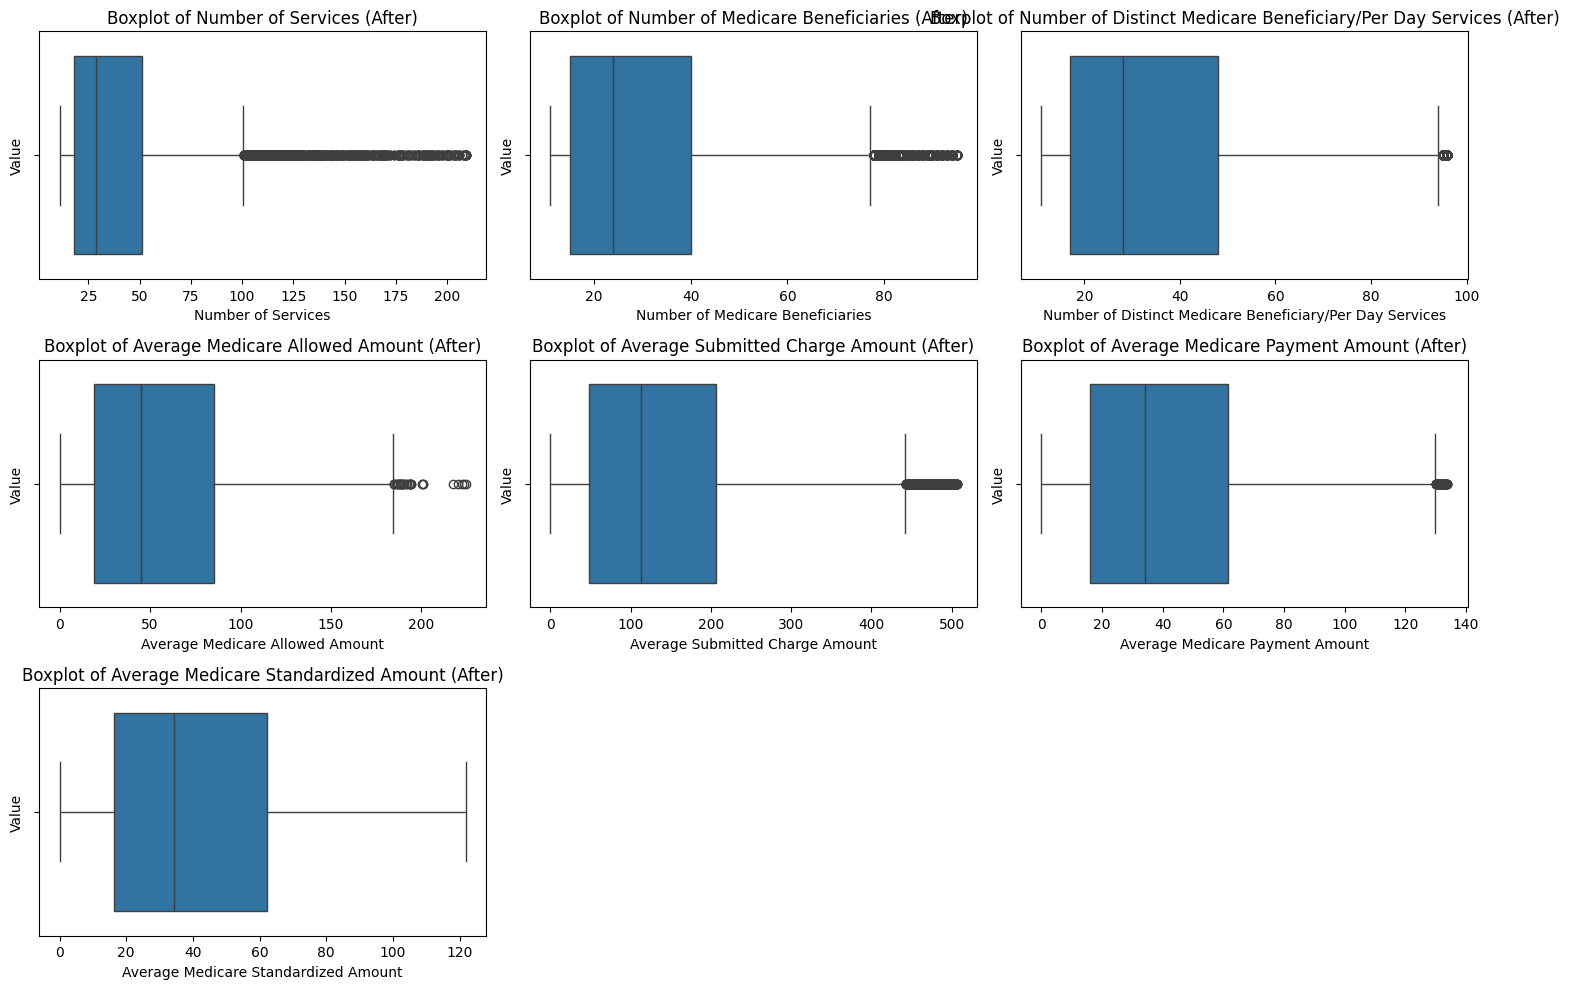

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]


for col in numeric_columns:
    data_dropped[col] = pd.to_numeric(data_dropped[col], errors='coerce')

def remove_outliers_iqr(df, column, multiplier=1.5):
    qQ1 = df[column].quantile(0.25)
    qQ3 = df[column].quantile(0.75)
    IQR = qQ3 - qQ1
    lower_bound = qQ1 - (multiplier * IQR)
    upper_bound = qQ3 + (multiplier * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for col in numeric_columns:
    data_dropped = remove_outliers_iqr(data_dropped, col, multiplier=1.2)


plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data_dropped, x=col)
    plt.title(f"Boxplot of {col} (After)")
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [28]:
data_test = data_dropped.copy()


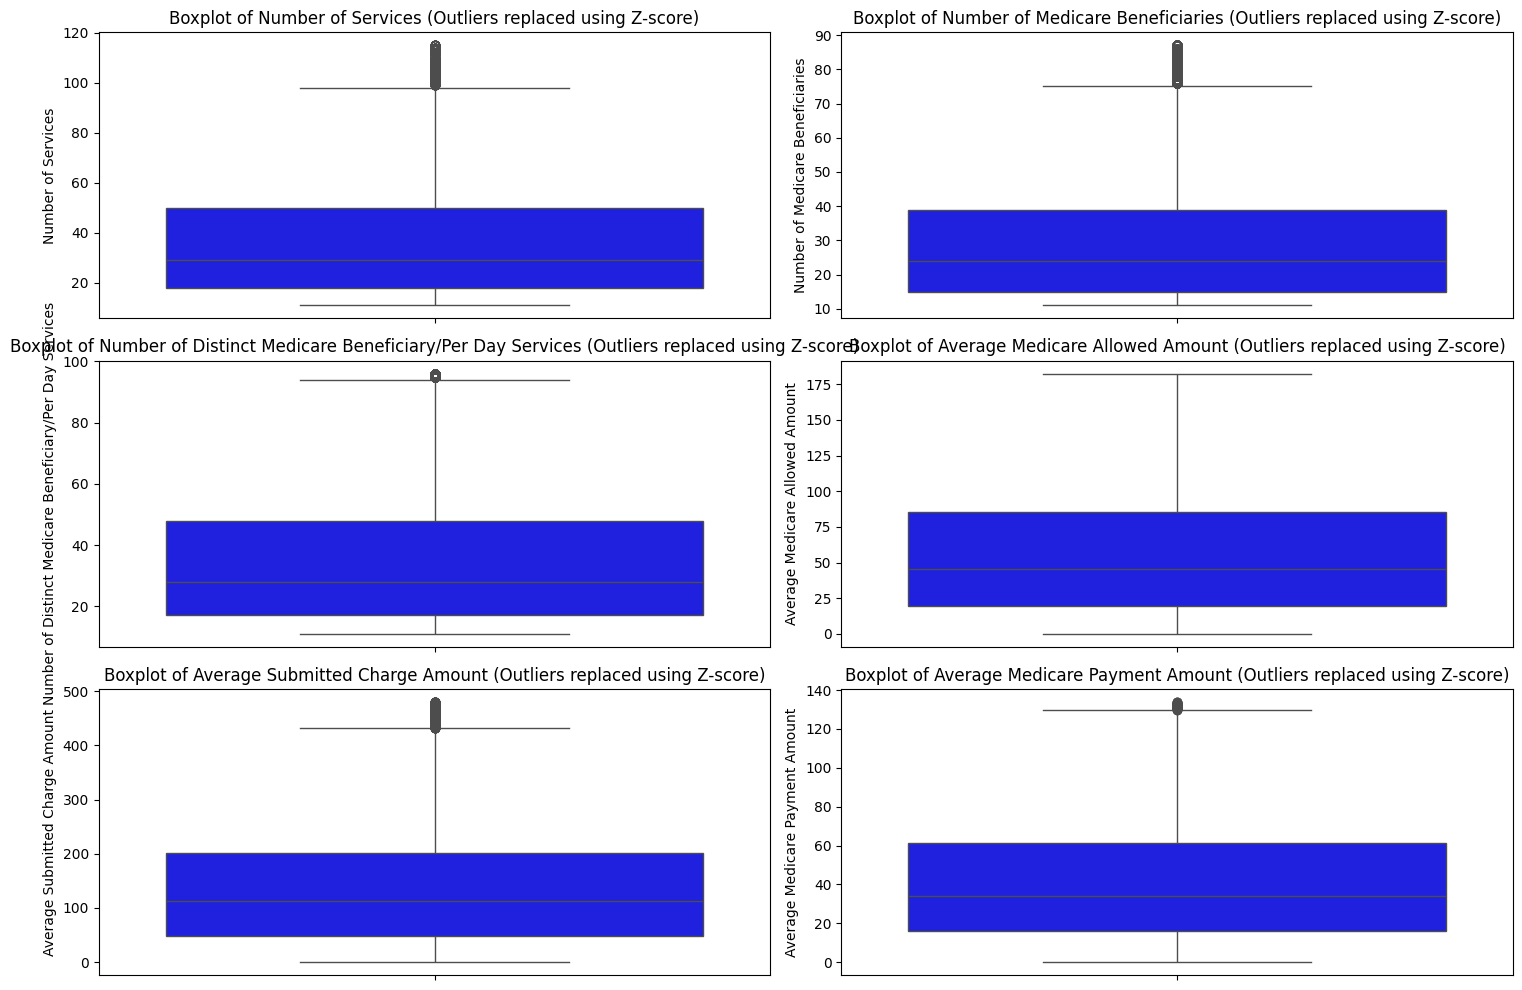

In [29]:
from scipy import stats
import numpy as np


relevant_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]


def replace_outliers_with_median_zscore(df, columns, threshold=3):
    df_clean = df.copy()
    for col in columns:

        z_scores = np.abs(stats.zscore(df_clean[col]))


        median_value = df_clean[col].median()


        df_clean[col] = np.where(z_scores > threshold, median_value, df_clean[col])

    return df_clean


data_zscore_replaced = replace_outliers_with_median_zscore(data_test, relevant_columns)


plt.figure(figsize=(15, 10))

for i, col in enumerate(relevant_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data_zscore_replaced[col], color="blue")
    plt.title(f"Boxplot of {col} (Outliers replaced using Z-score)")
    plt.tight_layout()

plt.show()


In [30]:
data_test1 = data_dropped.copy()
data_test1.to_csv('data_test1.csv', index=False)
loaded_data = pd.read_csv('data_test1.csv')

In [31]:

missing_values = data_test1.isnull().sum()


print(missing_values[missing_values > 0])


total_missing_values = data_test1.isnull().sum().sum()
print(f'Total missing values in the dataset: {total_missing_values}')


Series([], dtype: int64)
Total missing values in the dataset: 0


In [32]:
data_test1[relevant_columns] = data_test1[relevant_columns].replace(',', '', regex=True).apply(pd.to_numeric)

Detected Outliers:
         index  National Provider Identifier  \
56     1650322                    1164698122   
96     2553682                    1255711347   
204    1762354                    1174912109   
248    1283507                    1134115397   
275    9566238                    1972526614   
...        ...                           ...   
99799  8653432                    1871799809   
99910  1124764                    1114366325   
99928  8236706                    1831281245   
99934  3803001                    1386713204   
99941  1505543                    1154374932   

      Last Name/Organization Name of the Provider First Name of the Provider  \
56                                      KANDASAMY                       USHA   
96                                      RODRIGUEZ                     CARLOS   
204                                         CLARK                      SAIGE   
248                                         CRAIG                    WILLIAM   
275 

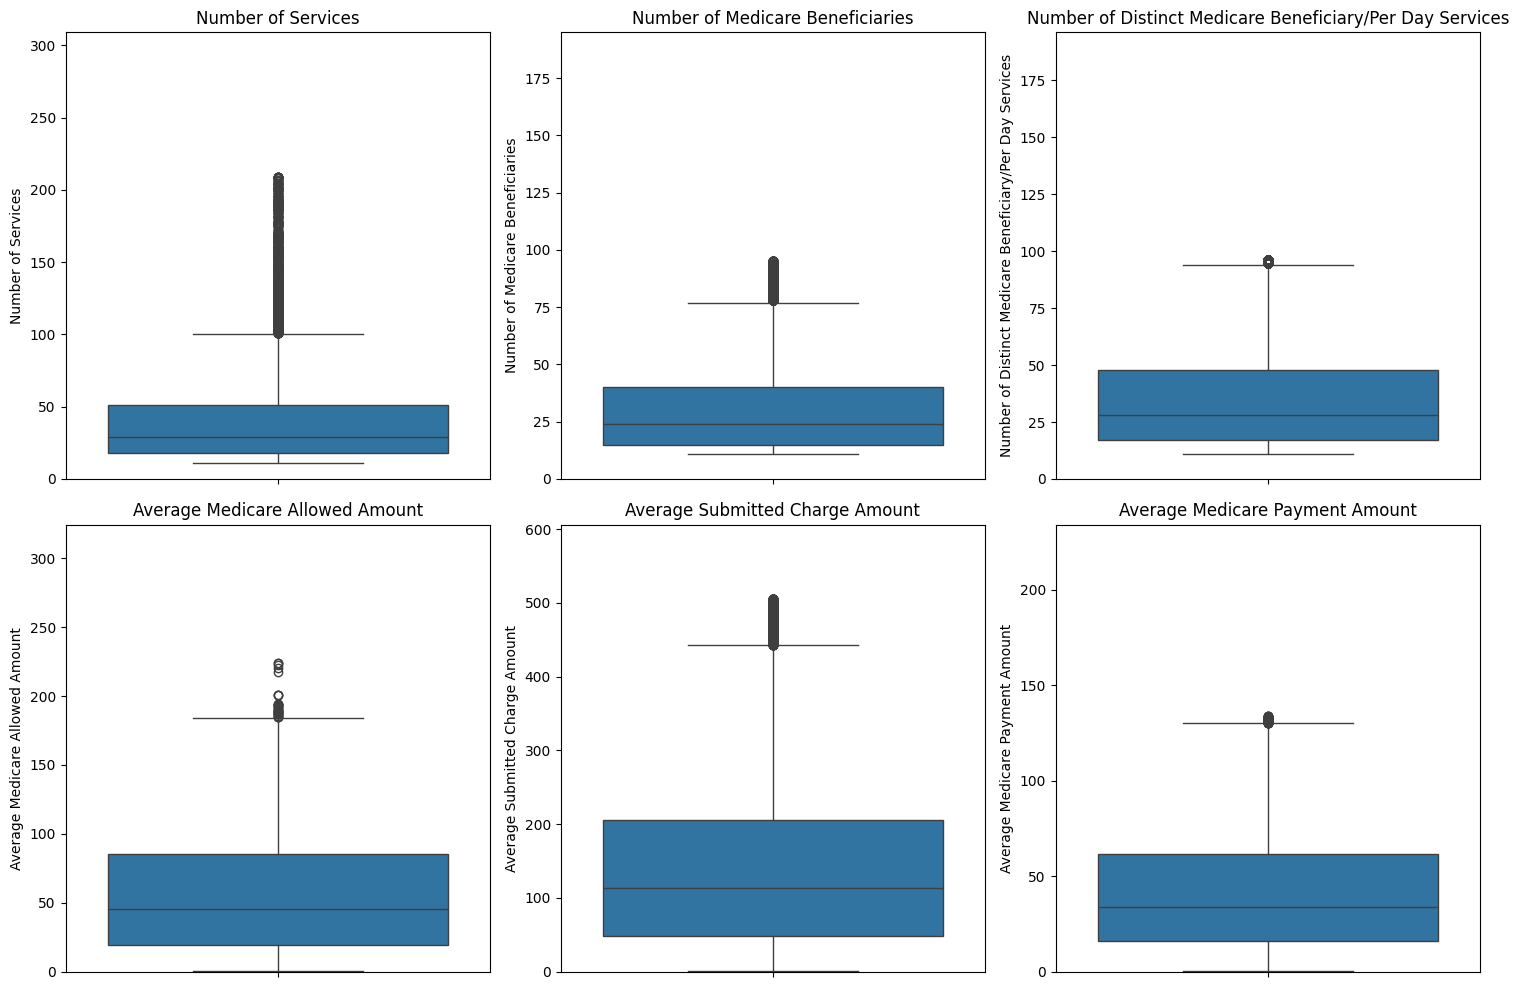

In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor


relevant_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount'
]

data_for_lof = data_test1[relevant_columns]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers = lof.fit_predict(data_for_lof)
data_test1['LOF_Outlier'] = outliers
outlier_data = data_test1[data_test1['LOF_Outlier'] == -1]
print("Detected Outliers:")
print(outlier_data)
outlier_data.to_csv('detected_outliers.csv', index=False)
data_cleaned_lof = data_test1[data_test1['LOF_Outlier'] == 1].copy()
data_cleaned_lof.drop('LOF_Outlier', axis=1, inplace=True)
data_test1[relevant_columns] = data_test1[relevant_columns].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(15, 10))
for i, column in enumerate(relevant_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_test1[column])
    plt.title(column)
    plt.ylim(0, data_test1[column].max() + 100)

plt.tight_layout()
plt.show()



In [34]:
pip install scikit-learn


In [35]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

label_encoding_columns = [
    'Gender of the Provider',
    'Entity Type of the Provider',
    'Medicare Participation Indicator',
    'HCPCS Drug Indicator',
    'Credentials of the Provider',
    'HCPCS Code',
    'HCPCS Description'
]

one_hot_encoding_columns = [
    'Provider Type',
    'Place of Service',
    'State Code of the Provider',
    'Country Code of the Provider'
]


label_encoder = LabelEncoder()


for col in label_encoding_columns:
    if col in data_dropped.columns:
        data_dropped[col] = label_encoder.fit_transform(data_dropped[col])


data_dropped = pd.get_dummies(data_dropped, columns=one_hot_encoding_columns, drop_first=False)


data_dropped = data_dropped.replace({True: 'T', False: 'F'})


print(data_dropped.head())


     index  National Provider Identifier  \
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   
6  2137027                    1215943535   
7  6169160                    1629160551   

  Last Name/Organization Name of the Provider First Name of the Provider  \
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   
6                                     BRUMITT                        TOM   
7                                   GALBREATH                     RONALD   

   Credentials of the Provider  Gender of the Provider  \
2                          305                       1   
3                          647                       1   
4                          284                       1   
6                          284                

In [36]:
data_dropped.isnull().sum()

,0
index,0
National Provider Identifier,0
Last Name/Organization Name of the Provider,0
First Name of the Provider,0
Credentials of the Provider,0
...,...
State Code of the Provider_ZZ,0
Country Code of the Provider_DE,0
Country Code of the Provider_JP,0
Country Code of the Provider_TR,0


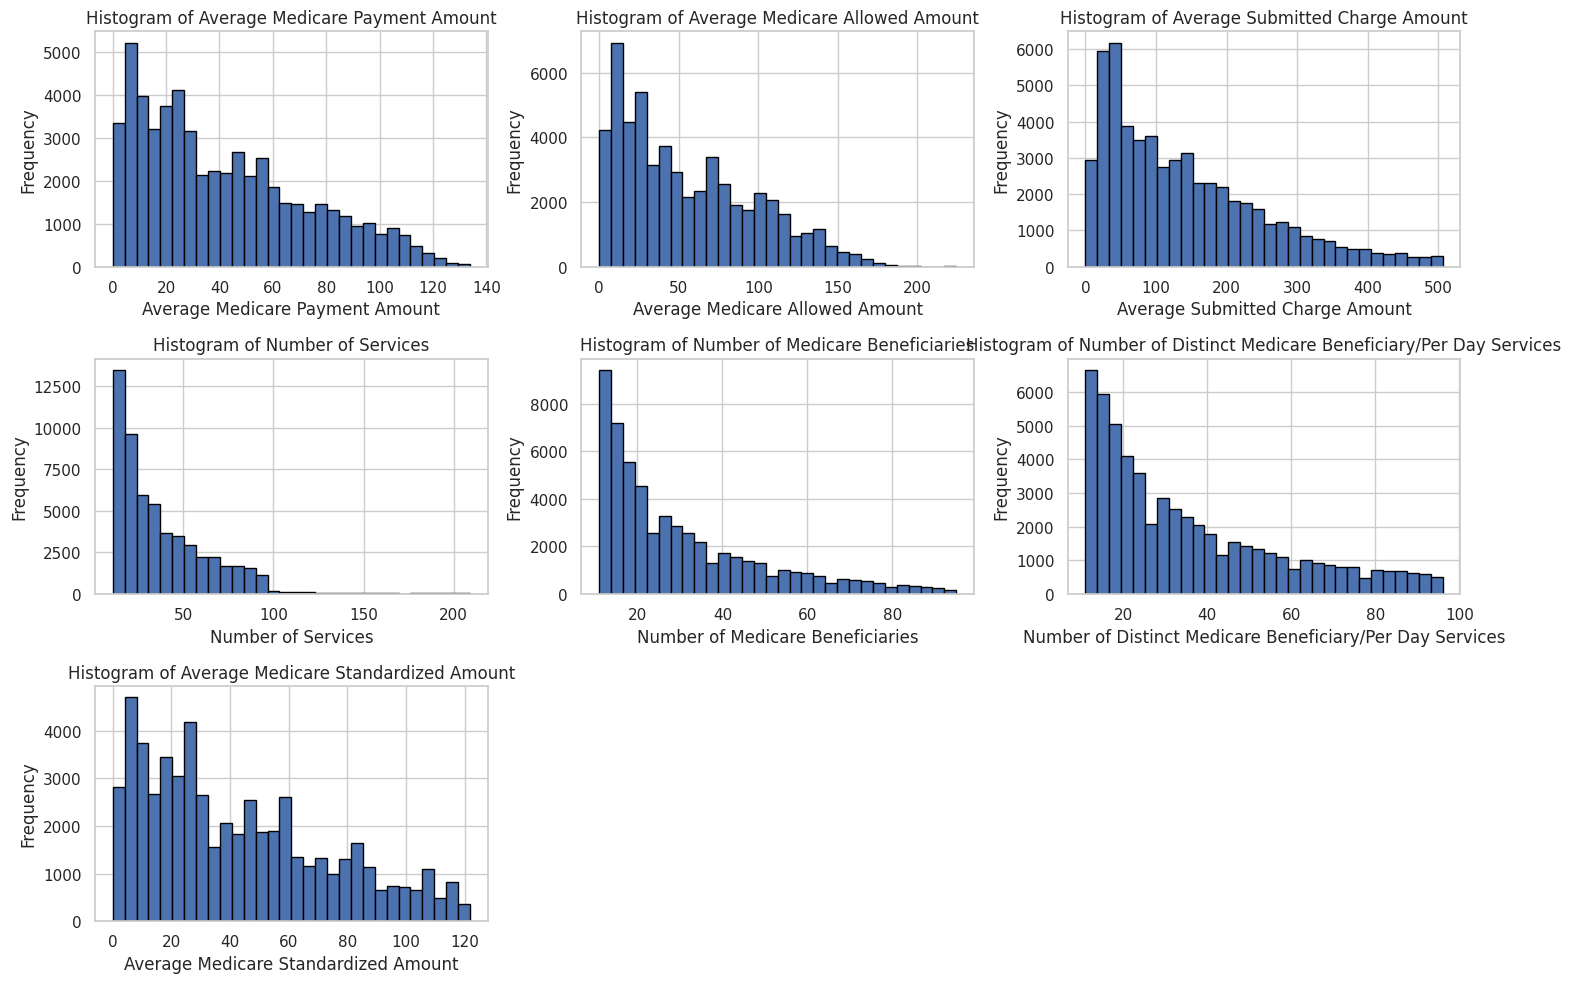

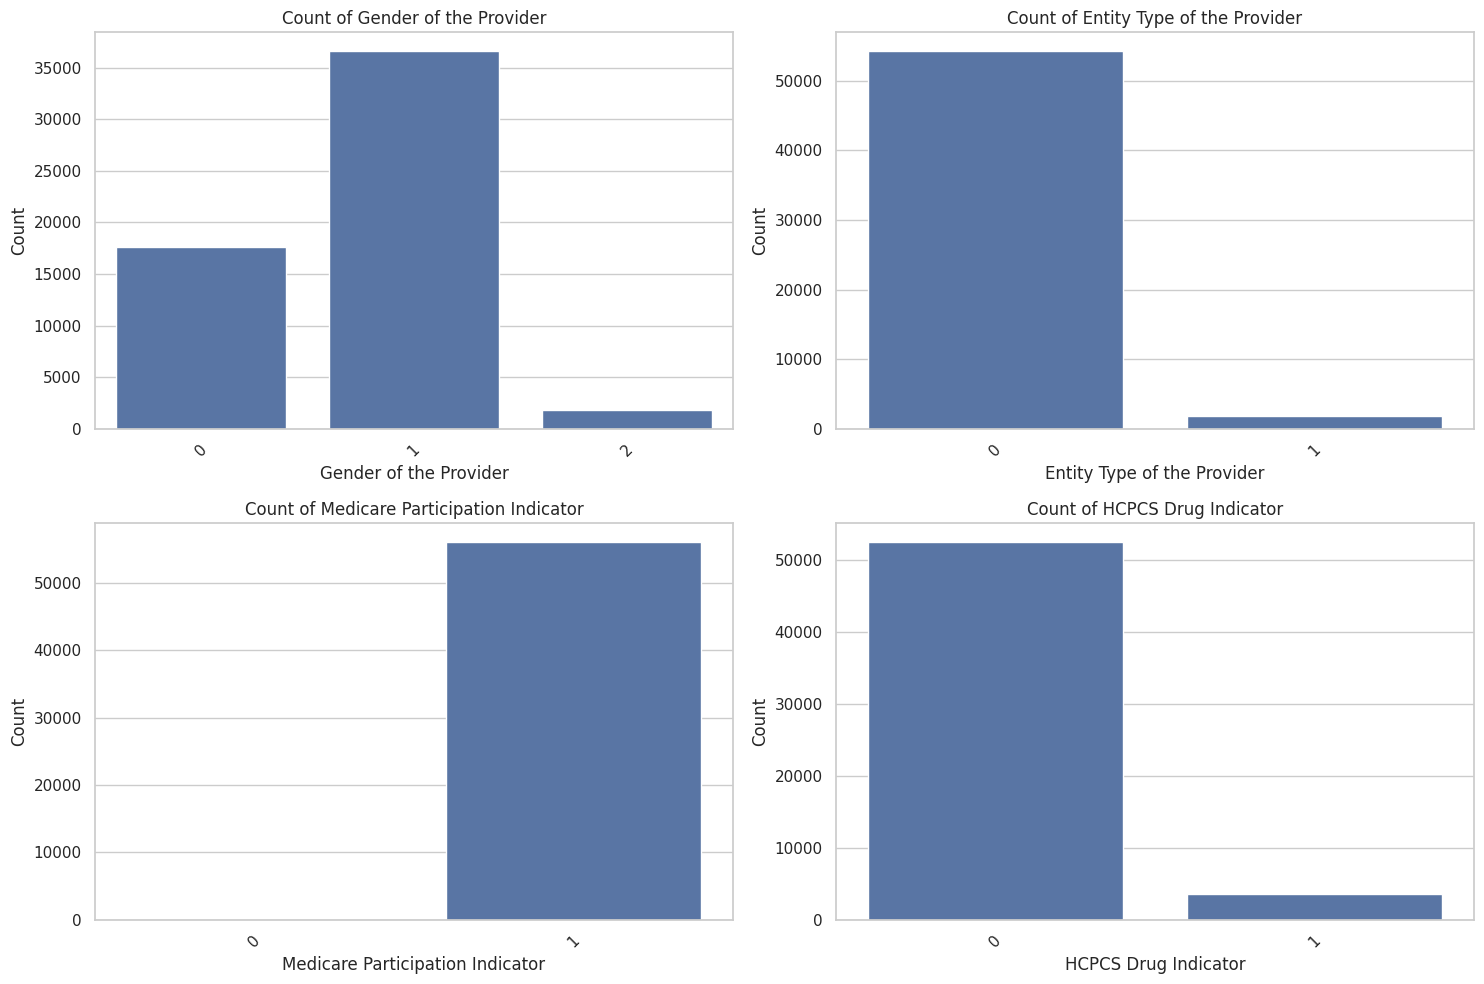

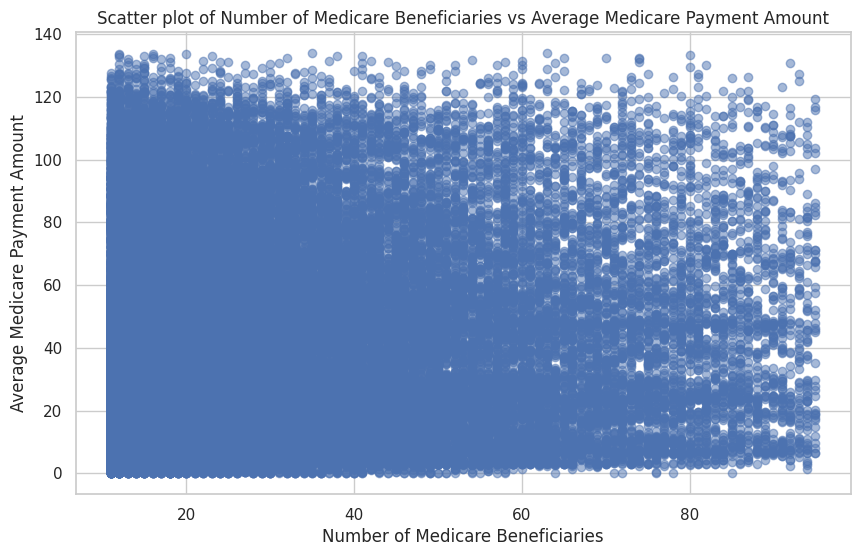

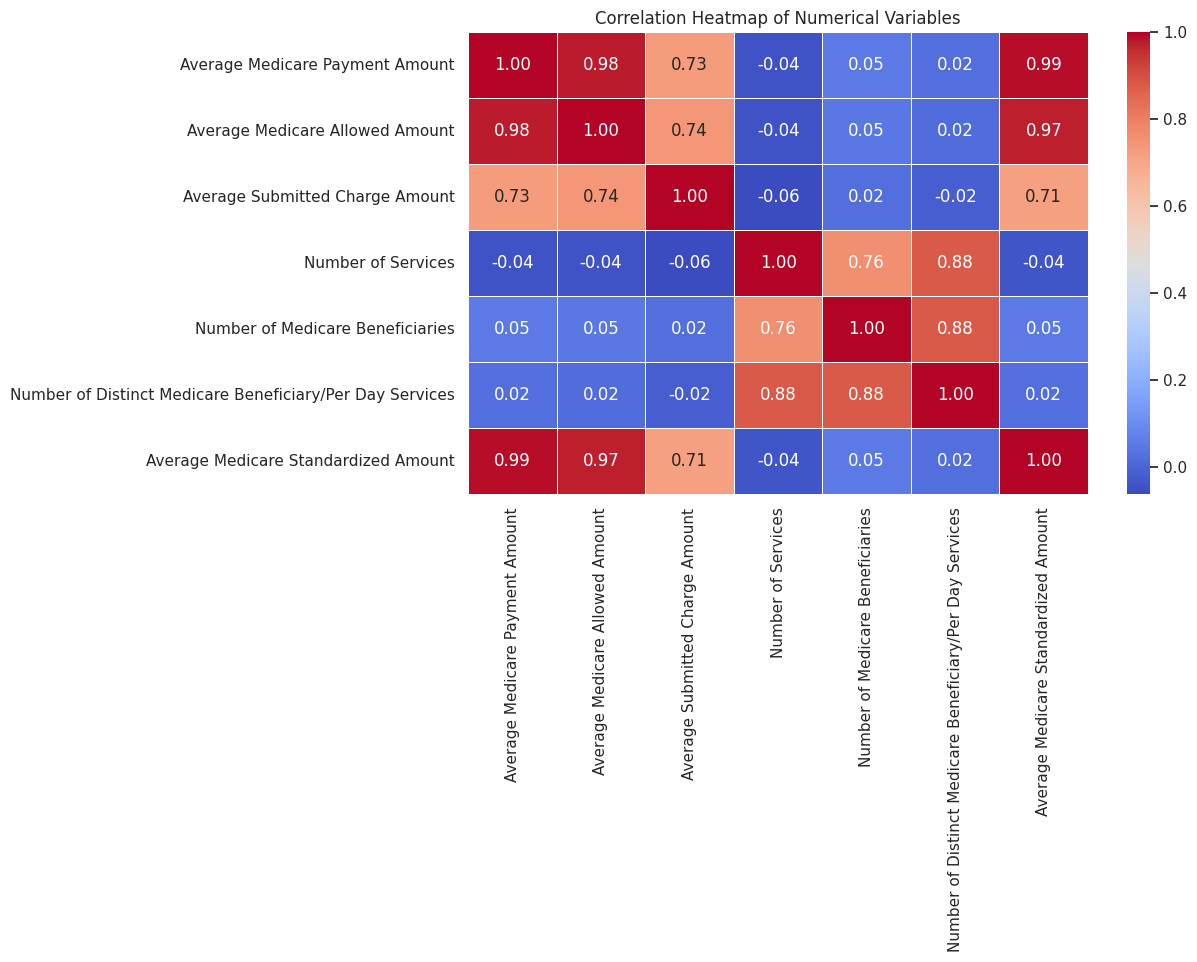

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


numerical_columns = [
    'Average Medicare Payment Amount',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Standardized Amount'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data_dropped[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


categorical_columns = [
    'Gender of the Provider',
    'Entity Type of the Provider',
    'Medicare Participation Indicator',
    'HCPCS Drug Indicator'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data_dropped, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(data_dropped['Number of Medicare Beneficiaries'], data_dropped['Average Medicare Payment Amount'], alpha=0.5)
plt.title('Scatter plot of Number of Medicare Beneficiaries vs Average Medicare Payment Amount')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Average Medicare Payment Amount')
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
sns.heatmap(data_dropped[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [39]:
data = data_dropped

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Your dataset
# Replace 'data_dropped' with your actual dataset if it's loaded from a file or a previous step
# data_dropped = pd.read_csv("your_file.csv") # Uncomment if loading from a file

# Columns to be normalized
normalize_cols = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services'
]

# Columns to be standardized
standardize_cols = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# 1. Min-Max Normalization for specified columns
min_max_scaler = MinMaxScaler()
data_dropped[normalize_cols] = min_max_scaler.fit_transform(data_dropped[normalize_cols])

# 2. Standard Scaling for specified columns
scaler = StandardScaler()
data_dropped[standardize_cols] = scaler.fit_transform(data_dropped[standardize_cols])

# Display the first few rows of the transformed dataset
print(data_dropped.head())


     index  National Provider Identifier  \
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   
6  2137027                    1215943535   
7  6169160                    1629160551   

  Last Name/Organization Name of the Provider First Name of the Provider  \
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   
6                                     BRUMITT                        TOM   
7                                   GALBREATH                     RONALD   

   Credentials of the Provider  Gender of the Provider  \
2                          305                       1   
3                          647                       1   
4                          284                       1   
6                          284                

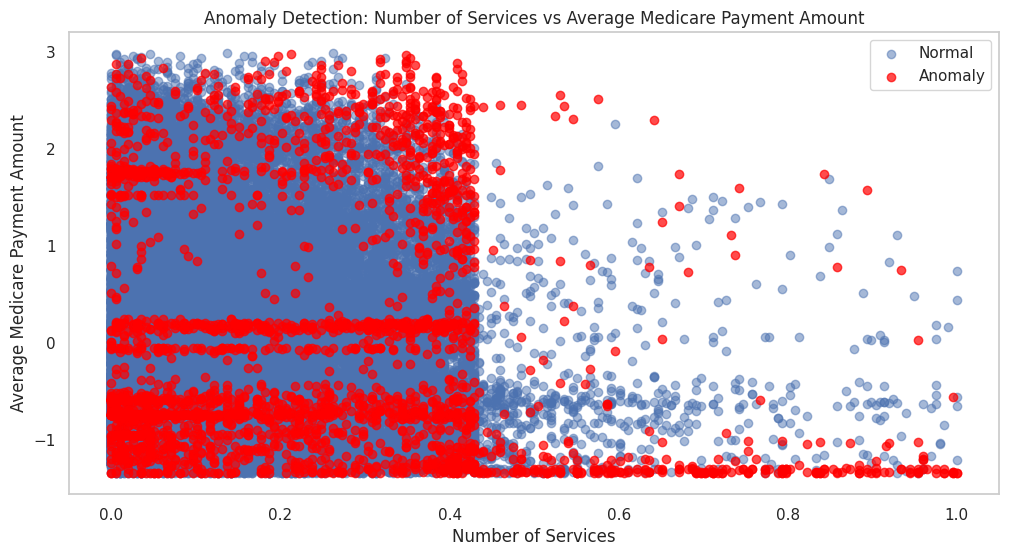

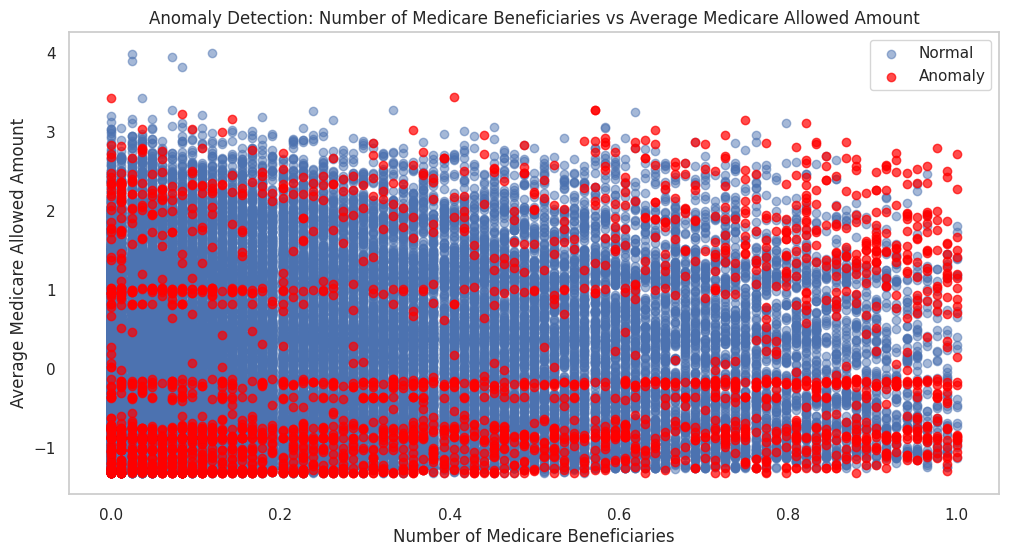

Anomalies detected:
         index  National Provider Identifier  \
40     3299893                    1336190958   
66     5164095                    1528077740   
76     6931480                    1700806304   
93     5785448                    1588757033   
105    8343393                    1841408283   
...        ...                           ...   
99650  8117409                    1821091067   
99735  9698536                    1982685434   
99754  6888063                    1699921296   
99910  1124764                    1114366325   
99992  6585662                    1669662151   

      Last Name/Organization Name of the Provider First Name of the Provider  \
40                  WILKES COUNTY BOARD OF HEALTH                    Unknown   
66                                      POLITOSKE                    DOUGLAS   
76                                   MURALITHARAN                   PUSHKALA   
93                         ENIGMA MANAGEMENT CORP                    Unknown   
105

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming 'data_dropped' is your DataFrame with the data
# Filter only numeric columns from the dataset
numeric_data = data_dropped.select_dtypes(include=['float64', 'int64'])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model on the numeric data only
iso_forest.fit(numeric_data)

# Predict anomalies
data_dropped['Anomaly'] = iso_forest.predict(numeric_data)

# Extract rows that are detected as anomalies
anomalies = data_dropped[data_dropped['Anomaly'] == -1]

# Visualizing the results: Number of Services vs Average Medicare Payment Amount
plt.figure(figsize=(12, 6))

# Scatter plot for normal data points
plt.scatter(data_dropped[data_dropped['Anomaly'] == 1]['Number of Services'],
            data_dropped[data_dropped['Anomaly'] == 1]['Average Medicare Payment Amount'],
            label='Normal', alpha=0.5)

# Scatter plot for anomalies
plt.scatter(anomalies['Number of Services'],
            anomalies['Average Medicare Payment Amount'],
            color='red', label='Anomaly', alpha=0.7)

# Adding labels and title
plt.title('Anomaly Detection: Number of Services vs Average Medicare Payment Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.legend()
plt.grid()
plt.show()

# Visualizing the results: Number of Medicare Beneficiaries vs Average Medicare Allowed Amount
plt.figure(figsize=(12, 6))

# Scatter plot for normal data points
plt.scatter(data_dropped[data_dropped['Anomaly'] == 1]['Number of Medicare Beneficiaries'],
            data_dropped[data_dropped['Anomaly'] == 1]['Average Medicare Allowed Amount'],
            label='Normal', alpha=0.5)

# Scatter plot for anomalies
plt.scatter(anomalies['Number of Medicare Beneficiaries'],
            anomalies['Average Medicare Allowed Amount'],
            color='red', label='Anomaly', alpha=0.7)

# Adding labels and title
plt.title('Anomaly Detection: Number of Medicare Beneficiaries vs Average Medicare Allowed Amount')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Average Medicare Allowed Amount')
plt.legend()
plt.grid()
plt.show()

# Print anomalies details
print("Anomalies detected:")
print(anomalies)
print(f"Total number of anomalies: {anomalies.shape[0]}")
